In [1]:
!pip install wordcloud

<a id="1"></a>
## <div style="text-align: left; background-color:#DEF5B9; font-family: Trebuchet MS; color:#1D3E06; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">1. Import Libraries 📚</div> 

In [2]:
import os
import time
import librosa
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import trange,tqdm

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearnex import patch_sklearn, config_context

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
## <div style="text-align: left; background-color:#DEF5B9; font-family: Trebuchet MS; color:#1D3E06; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">2. Read and Explain Dataset 📝</div> 

<a id="2.1"></a>
### <div style="text-align: left; background-color:#F0DCED; font-family:Trebuchet MS;color:#8F2A46; padding: 14px; line-height: 1;border-radius:10px;border-style: solid;border-color: dark pink">2.1 Reading dataset 🗺</div>

In [3]:
df = pd.read_csv('weather.csv')

In [4]:
df.head(10)

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01
5,Bac Lieu,28,23,14,ENE,0.0,75,55,1012,2014-01-01
6,Bac Lieu,29,23,10,ENE,0.4,75,42,1012,2015-01-01
7,Bac Lieu,32,24,22,ENE,0.0,63,9,1015,2016-01-01
8,Bac Lieu,30,24,20,ENE,0.5,76,35,1011,2017-01-01
9,Bac Lieu,29,23,16,E,0.0,70,33,1010,2018-01-01


<a id="2.2"></a>
### <div style="text-align: left; background-color:#F2EDF3; font-family:Trebuchet MS;color: #8F2A46; padding: 14px; line-height: 1;border-radius:10px;border-style: solid;border-color: dark pink">2.2 Explain dataset 🗺</div>

<div style="border-radius:10px;
            border :#0A0104 solid;
            padding: 15px;
            background-color:#E9F6E2;
           font-size:110%;
            text-align: left">
    <span style="color:'black' ;"><center>📁 The dataset includes <mark>10 columns </mark></center></span>

 **province**:  Province where data recorded (dd/mm/yyyy)
    
 **max**: Max tempeture of the day (Celcius)
    
 **min**: Min tempeture of the day (Celcius)
    
 **wind**: Wind speed (km/h)
    
 **wind_d**: Wind Direction 
    
 **rain**: Amount of rain (mm)
    
 **humidi**: Humidity (%)
    
 **cloud**: Cloud (%)
    
 **pressure**: Population of the Country/Territories in the year 2010
    
 **date**: Date record

 **👉 Target: <mark>rain</mark> column**

<a id="3"></a>
## <div style="text-align: left; background-color:#DEF5B9; font-family: Trebuchet MS; color:#1D3E06; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">3. Exploratory Data Analysis 🔎</div> 

In [5]:
num_rows, num_cols = df.shape
print(f'There are {num_rows} rows and {num_cols} columns in the dataset')

There are 181960 rows and 10 columns in the dataset


In [6]:
df.columns

Index(['province', 'max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud',
       'pressure', 'date'],
      dtype='object')

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   province  181960 non-null  object 
 1   max       181960 non-null  int64  
 2   min       181960 non-null  int64  
 3   wind      181960 non-null  int64  
 4   wind_d    181960 non-null  object 
 5   rain      181960 non-null  float64
 6   humidi    181960 non-null  int64  
 7   cloud     181960 non-null  int64  
 8   pressure  181960 non-null  int64  
 9   date      181960 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 13.9+ MB


In [9]:
# convert date column to datetime
df['date']= pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date'].dtype

dtype('<M8[ns]')

In [10]:
df = df.set_index('date',drop=True)
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure
date,,,,,,,,,
2009-01-01,Bac Lieu,27,22,17,NNE,6.90,90,71,1010
2010-01-01,Bac Lieu,31,25,20,ENE,0.00,64,24,1010
2011-01-01,Bac Lieu,29,24,14,E,0.00,75,45,1008
2012-01-01,Bac Lieu,30,24,30,E,0.00,79,52,1012
2013-01-01,Bac Lieu,31,25,20,ENE,0.00,70,24,1010


In [11]:
wind_d_count = df['wind_d'].value_counts().to_frame()
wind_d_count

,wind_d
ESE,21526
SE,21205
E,19773
WSW,18310
ENE,16527
SW,16444
SSE,16305
S,13927
SSW,13267
W,7472


In [12]:
print(f"Summary Of The Dataset with numerical columns :")
df.describe()

Summary Of The Dataset with numerical columns :


,max,min,wind,rain,humidi,cloud,pressure
count,181960.00,181960.00,181960.00,181960.00,181960.00,181960.00,181960.00
mean,29.84,23.28,11.04,6.57,77.08,41.72,1010.23
std,4.57,3.95,5.31,13.60,9.29,23.88,4.64
min,4.00,2.00,1.00,0.00,23.00,0.00,988.00
25%,28.00,21.00,7.00,0.10,71.00,23.00,1008.00
50%,31.00,24.00,10.00,1.80,78.00,38.00,1010.00
75%,33.00,26.00,14.00,7.50,83.00,58.00,1012.00
max,46.00,32.00,54.00,596.40,100.00,100.00,1038.00


In [13]:
print(f"Summary Of The Dataset with catergorical columns :")
df.describe(include='object')

Summary Of The Dataset with catergorical columns :


,province,wind_d
count,181960,181960
unique,40,16
top,Bac Lieu,ESE
freq,4549,21526


In [14]:
df.nunique()

province      40
max           43
min           31
wind          51
wind_d        16
rain        1298
humidi        77
cloud        101
pressure      49
dtype: int64

In [15]:
df.corr()

,max,min,wind,rain,humidi,cloud,pressure
max,1.00,0.78,-0.05,-0.07,-0.36,-0.55,-0.67
min,0.78,1.00,0.18,0.09,-0.06,-0.30,-0.72
wind,-0.05,0.18,1.00,0.02,-0.09,-0.01,0.02
rain,-0.07,0.09,0.02,1.00,0.36,0.30,-0.21
humidi,-0.36,-0.06,-0.09,0.36,1.00,0.55,-0.15
cloud,-0.55,-0.30,-0.01,0.30,0.55,1.00,0.18
pressure,-0.67,-0.72,0.02,-0.21,-0.15,0.18,1.00


In [16]:
df.isnull().sum()

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
dtype: int64


**👉 There are total of <mark>40 provinces</mark> in the dataset.**

**👉 There are a total of <mark>181960 observations</mark>.**

**👉 There are a total of <mark>10 features</mark>.**

**👉 The province with the most observations is <mark>Bac Lieu</mark>.**

**👉 Data contains <mark>no missing value</mark>.**

In [17]:
df.columns

Index(['province', 'max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud',
       'pressure'],
      dtype='object')

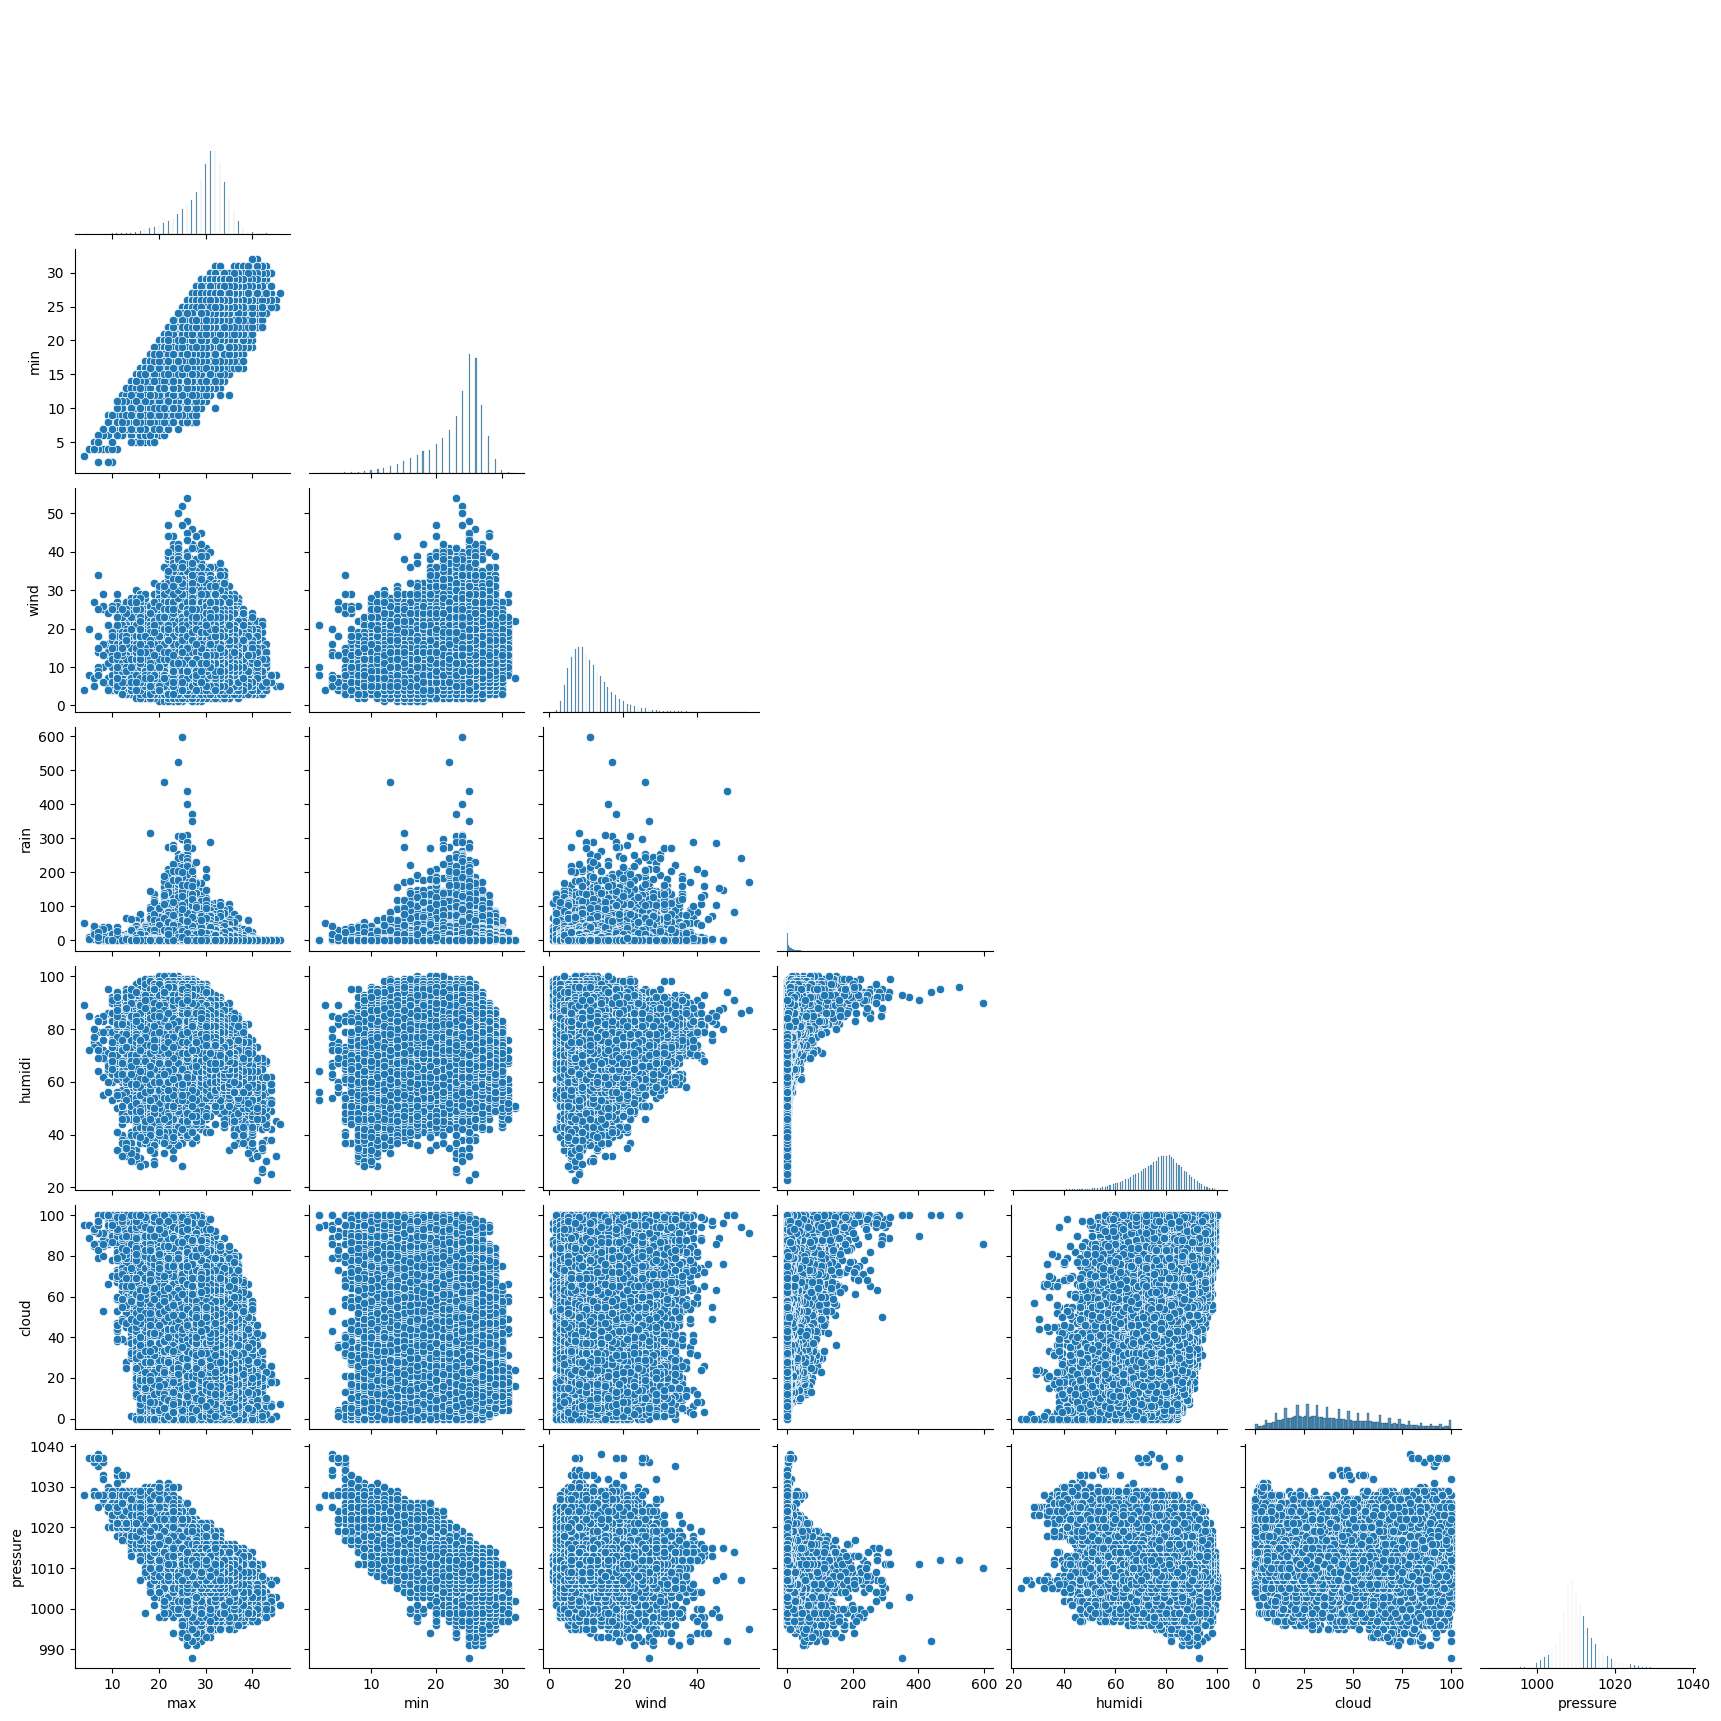

In [18]:
sns.pairplot(df, corner=True)

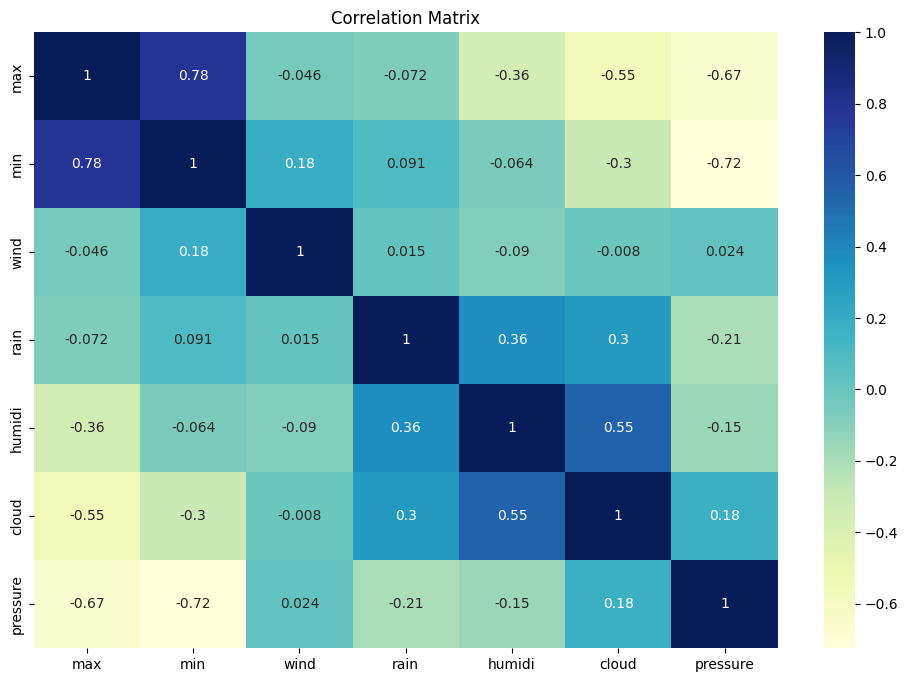

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

**👉 We can see that the <mark>rain</mark> column is <mark>right skewed</mark>.**

**👉 We can see that there is no the correlation between <mark>rain</mark> and <mark>other features</mark>. So we can't not use linear regression to predict the rain.**

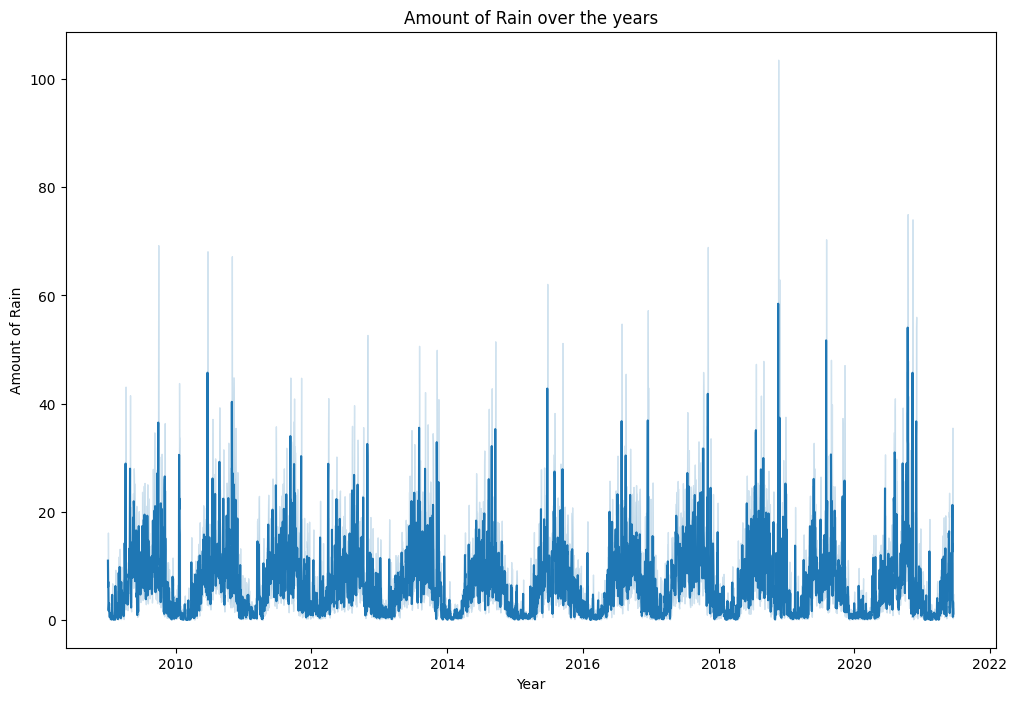

In [20]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x = df.index, y='rain')
plt.title('Amount of Rain over the years')
plt.xlabel('Year')
plt.ylabel('Amount of Rain')
plt.show()

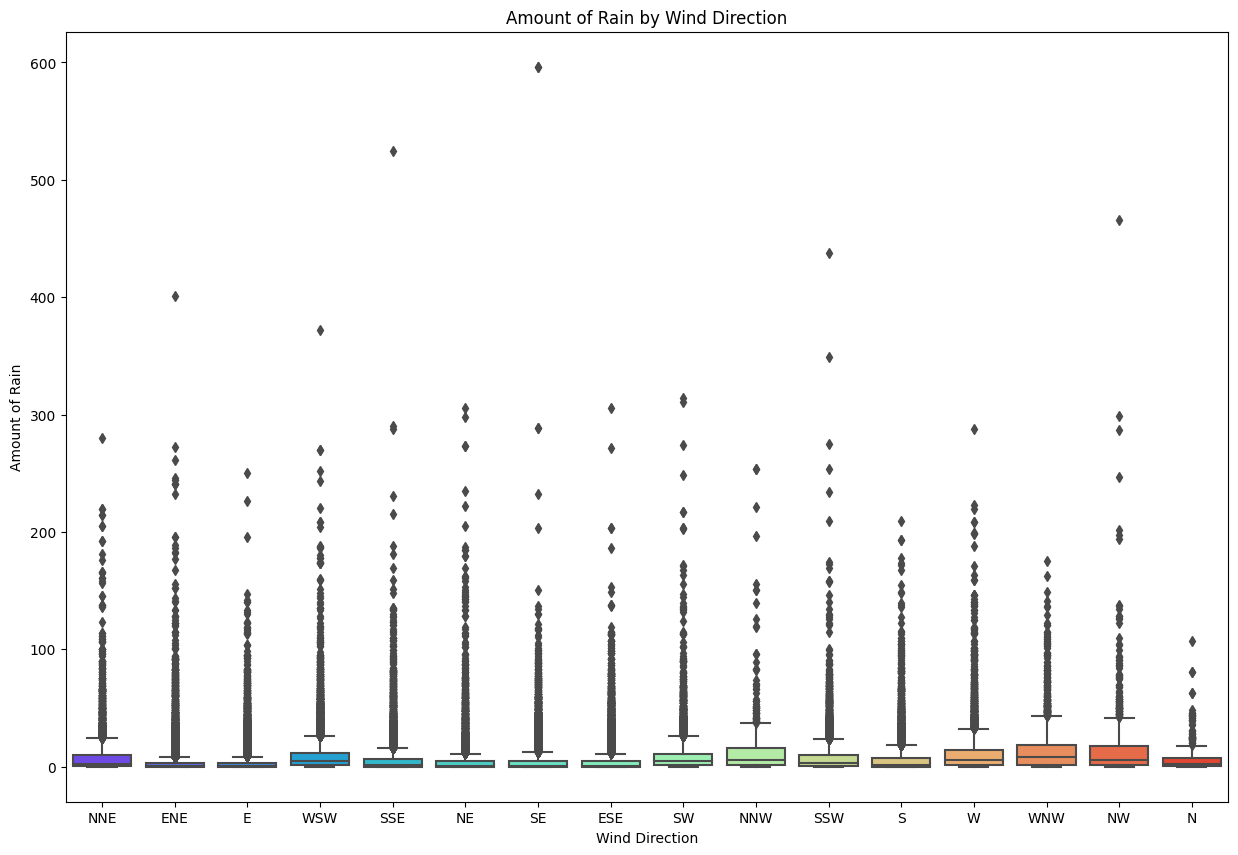

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='wind_d', y='rain', palette='rainbow')
plt.title('Amount of Rain by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Amount of Rain')
plt.show()

<a id="4"></a>
## <div style="text-align: left; background-color:#DEF5B9; font-family: Trebuchet MS; color:#1D3E06; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">4. Machine Learning Approach 📉</div> 

<a id="4.1"></a>
### <div style="text-align: left; background-color:#F0DCED; font-family:Trebuchet MS;color:#8F2A46; padding: 14px; line-height: 1; text-align: center; border-radius:10px;border-style: solid;border-color: dark pink">4.1 Classification </div>

In [22]:
df.columns

Index(['province', 'max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud',
       'pressure'],
      dtype='object')

In [23]:
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure
date,,,,,,,,,
2009-01-01,Bac Lieu,27,22,17,NNE,6.90,90,71,1010
2010-01-01,Bac Lieu,31,25,20,ENE,0.00,64,24,1010
2011-01-01,Bac Lieu,29,24,14,E,0.00,75,45,1008
2012-01-01,Bac Lieu,30,24,30,E,0.00,79,52,1012
2013-01-01,Bac Lieu,31,25,20,ENE,0.00,70,24,1010


In [24]:
df.to_csv('weather_training.csv')

In [25]:
num = ['max', 'min', 'wind' ,'humidi', 'cloud', 'pressure']
cat = ['province','wind_d']

In [26]:
X = df.drop(['rain'], axis=1)
y = df['rain'].astype('str')
X

,province,max,min,wind,wind_d,humidi,cloud,pressure
date,,,,,,,,
2009-01-01,Bac Lieu,27,22,17,NNE,90,71,1010
2010-01-01,Bac Lieu,31,25,20,ENE,64,24,1010
2011-01-01,Bac Lieu,29,24,14,E,75,45,1008
2012-01-01,Bac Lieu,30,24,30,E,79,52,1012
2013-01-01,Bac Lieu,31,25,20,ENE,70,24,1010
...,...,...,...,...,...,...,...,...
2016-12-28,Soc Trang,28,23,8,SSW,75,50,1011
2017-12-28,Soc Trang,30,24,21,ENE,81,50,1011
2018-12-28,Soc Trang,26,24,9,ENE,91,75,1009


In [27]:
y

date
2009-01-01    6.9
2010-01-01    0.0
2011-01-01    0.0
2012-01-01    0.0
2013-01-01    0.0
             ... 
2016-12-28    0.0
2017-12-28    7.2
2018-12-28    1.3
2019-12-28    0.0
2020-12-28    0.7
Name: rain, Length: 181960, dtype: object

In [28]:
for index in range(len(y)):
    if y[index] != '0.0':
        y[index] = 'Rain'
    else:
        y[index] = 'No Rain'

In [29]:
min_max_scaler = MinMaxScaler()
X[num] = min_max_scaler.fit_transform(X[num])

label_encoder = LabelEncoder()
for column in cat:
    X[column] = label_encoder.fit_transform(X[column])

X.head()

,province,max,min,wind,wind_d,humidi,cloud,pressure
date,,,,,,,,
2009-01-01,0,0.55,0.67,0.30,5,0.87,0.71,0.44
2010-01-01,0,0.64,0.77,0.36,1,0.53,0.24,0.44
2011-01-01,0,0.60,0.73,0.25,0,0.68,0.45,0.40
2012-01-01,0,0.62,0.73,0.55,0,0.73,0.52,0.48
2013-01-01,0,0.64,0.77,0.36,1,0.61,0.24,0.44


In [30]:
y = label_encoder.fit_transform(y)
y

array([1, 0, 0, ..., 1, 0, 1])

In [31]:
X

,province,max,min,wind,wind_d,humidi,cloud,pressure
date,,,,,,,,
2009-01-01,0,0.55,0.67,0.30,5,0.87,0.71,0.44
2010-01-01,0,0.64,0.77,0.36,1,0.53,0.24,0.44
2011-01-01,0,0.60,0.73,0.25,0,0.68,0.45,0.40
2012-01-01,0,0.62,0.73,0.55,0,0.73,0.52,0.48
2013-01-01,0,0.64,0.77,0.36,1,0.61,0.24,0.44
...,...,...,...,...,...,...,...,...
2016-12-28,27,0.57,0.70,0.13,11,0.68,0.50,0.46
2017-12-28,27,0.62,0.73,0.38,1,0.75,0.50,0.46
2018-12-28,27,0.52,0.73,0.15,1,0.88,0.75,0.42


In [32]:
X = np.array(X)
y = np.array(y)
y = y.reshape(-1,1)
X = X.astype('float32')
y = y.astype('float32')

print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (181960, 8)
Shape of y: (181960, 1)


In [33]:
SEED = 1337

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (127372, 8)
Shape of y_train: (127372, 1)
Shape of X_test: (54588, 8)
Shape of y_test: (54588, 1)


In [35]:
classifiers = [#['SVC',SVC(probability = True, random_state=SEED)],
                ['ExtraTreesClassifier', ExtraTreesClassifier(random_state=SEED)],
                ['LogisticRegression', LogisticRegression(random_state=SEED)],
              ['KNeighborsClassifier', KNeighborsClassifier()],
              ['RandomForestClassifier', RandomForestClassifier(random_state=SEED)],
                ['XGBClassifier', XGBClassifier(random_state=SEED)],
                ['MLPClassifier', MLPClassifier(random_state=SEED)],
                ['GaussianNB', GaussianNB()],
                ['DecisionTreeClassifier', DecisionTreeClassifier(random_state=SEED)]]

In [36]:
def plot_roc_curve(Y_test, Y_pred, name, title):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

    auc = roc_auc_score(Y_test, Y_pred)

    plt.plot(fpr, tpr, label="{0} (a = {1:.2f})".format(name.replace("Classifier", ""), auc))
    plt.plot([0, 1], [0, 1], linestyle="dashed")
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.savefig(title + ".png")
    # plt.show()

def plot_confusion_matrix(cm, title):
    df_cm = pd.DataFrame(cm, index = [i for i in ['Rain', 'No Rain']],
                    columns = [i for i in ['Rain', 'No Rain']])
    df_cm_normed = df_cm/df_cm.sum()
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt="", )
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [37]:
patch_sklearn()

def evaluate_classifiers(classifiers):
    models = []
    Accuracy_set = pd.DataFrame(index=None, columns=['Model','Accuracy(Train)','Accuracy(Test)','F1(Train)','F1(Test)', 'Precision(Train)','Precision(Test)', 'Recall(Train)','Recall(Test)', 'Log_loss(Train)','Log_loss(Test)', 'Train_Time(s)', 'Confusion_Matrix(Test)'])
    for i in tqdm(range(len(classifiers))):
        name = classifiers[i][0]
        model = classifiers[i][1]
        time_start = time.time()
        model.fit(X_train,y_train)
        time_end = time.time()
        

        y_train_predicted = model.predict(X_train)
        y_test_predicited = model.predict(X_test)
        
        plot_roc_curve(y_test, y_test_predicited, name, "Machine Learning Algorithms Roc-Curve")

        accuracy_train = accuracy_score(y_train, y_train_predicted)
        accuracy_test = accuracy_score(y_test, y_test_predicited)

        f1_Score_train = f1_score(y_train, y_train_predicted,average='micro')
        f1_Score_test = f1_score(y_test, y_test_predicited,average='micro')

        precision_score_train = precision_score(y_train, y_train_predicted,average='micro')
        precision_score_test = precision_score(y_test, y_test_predicited,average='micro')

        recall_score_train = recall_score(y_train, y_train_predicted,average='micro')
        recall_score_test = recall_score(y_test, y_test_predicited,average='micro')

        log_loss_train = log_loss(y_train, model.predict_proba(X_train))
        log_loss_test = log_loss(y_test, model.predict_proba(X_test))
        
        cf_matrix = confusion_matrix(y_test, y_test_predicited)

        train_time = time_end - time_start
        
        # store the models
        models.append((name,accuracy_test,model))

        Accuracy_set = Accuracy_set.append(pd.Series({'Model':name, 'Accuracy(Train)':accuracy_train,'Accuracy(Test)':accuracy_test,'F1(Train)':f1_Score_train,'F1(Test)':f1_Score_test,'Precision(Train)':precision_score_train,'Precision(Test)':precision_score_test,'Recall(Train)':recall_score_train,'Recall(Test)':recall_score_test,'Log_loss(Train)':log_loss_train,'Log_loss(Test)':log_loss_test,'Train_Time(s)':train_time, 'Confusion_Matrix(Test)':cf_matrix}),ignore_index=True)
    return Accuracy_set, models

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


  0%|          | 0/8 [00:00<?, ?it/s]

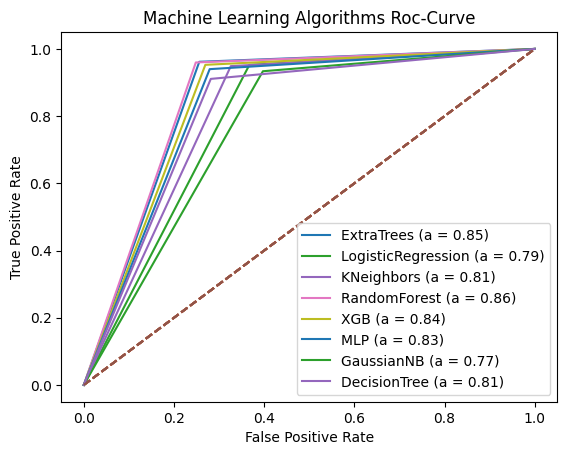

In [38]:
Accuracy_set, models = evaluate_classifiers(classifiers)

In [39]:
Accuracy_set.sort_values(by='Accuracy(Test)').style.background_gradient(cmap= plt.cm.Blues)

,Model,Accuracy(Train),Accuracy(Test),F1(Train),F1(Test),Precision(Train),Precision(Test),Recall(Train),Recall(Test),Log_loss(Train),Log_loss(Test),Train_Time(s),Confusion_Matrix(Test)
6,GaussianNB,0.856499,0.859914,0.856499,0.859914,0.856499,0.859914,0.856499,0.859914,0.345225,0.339017,0.023554,[[ 7328 4828] [ 2819 39613]]
7,DecisionTreeClassifier,1.000000,0.867956,1.000000,0.867956,1.000000,0.867956,1.000000,0.867956,0.000000,4.759336,0.457108,[[ 8733 3423] [ 3785 38647]]
1,LogisticRegression,0.879251,0.881348,0.879251,0.881348,0.879251,0.881348,0.879251,0.881348,0.290810,0.287043,0.064891,[[ 7693 4463] [ 2014 40418]]
2,KNeighborsClassifier,0.917360,0.887576,0.917360,0.887576,0.917360,0.887576,0.917360,0.887576,0.171333,1.116013,0.203437,[[ 8194 3962] [ 2175 40257]]
5,MLPClassifier,0.890651,0.891038,0.890651,0.891038,0.890651,0.891038,0.890651,0.891038,0.258806,0.257906,39.389435,[[ 8763 3393] [ 2555 39877]]
4,XGBClassifier,0.914432,0.903202,0.914432,0.903202,0.914432,0.903202,0.914432,0.903202,0.203193,0.229592,1.653732,[[ 8880 3276] [ 2008 40424]]
0,ExtraTreesClassifier,1.000000,0.913223,1.000000,0.913223,1.000000,0.913223,1.000000,0.913223,0.000000,0.226118,8.246934,[[ 9043 3113] [ 1624 40808]]
3,RandomForestClassifier,0.999992,0.913369,0.999992,0.913369,0.999992,0.913369,0.999992,0.913369,0.057682,0.232778,11.067490,[[ 9137 3019] [ 1710 40722]]


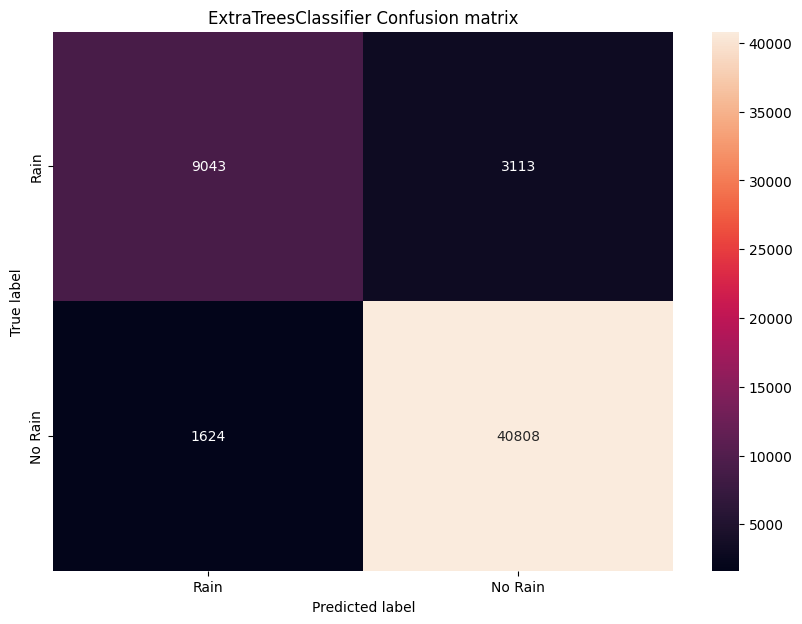

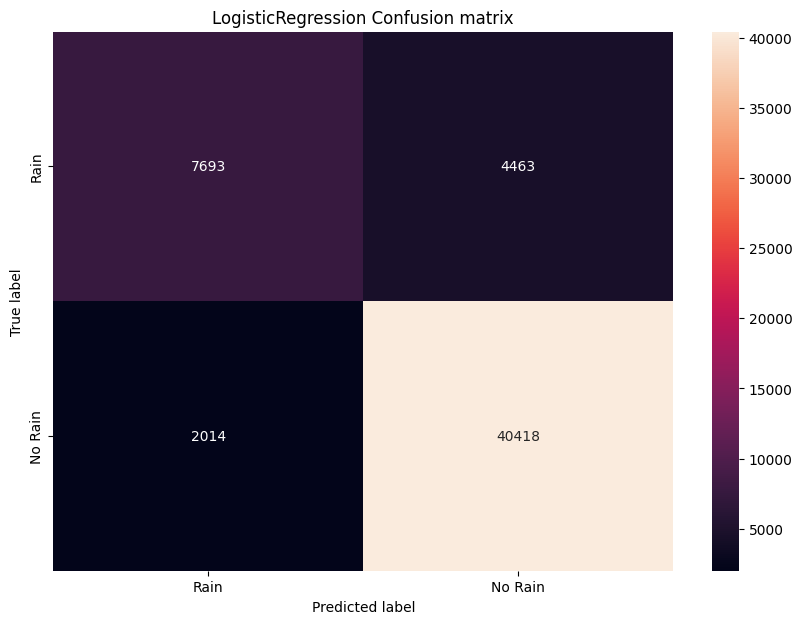

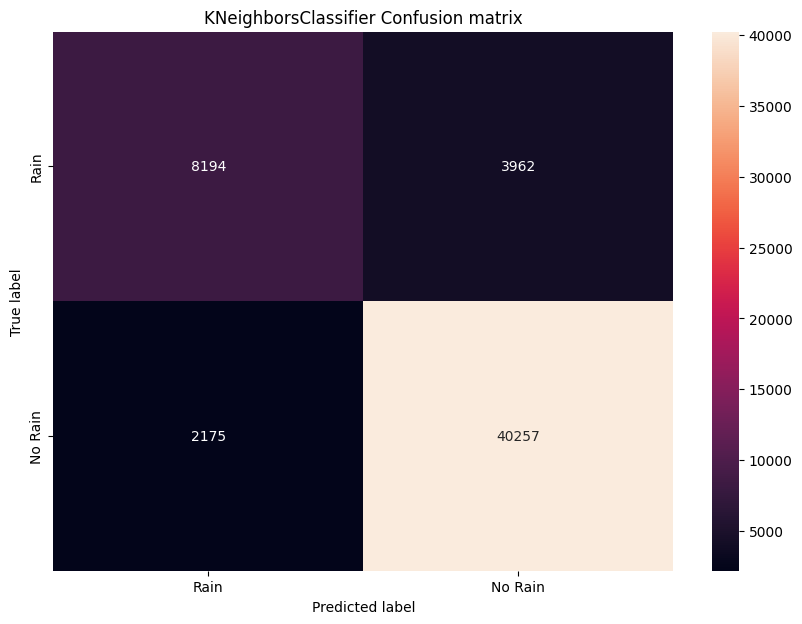

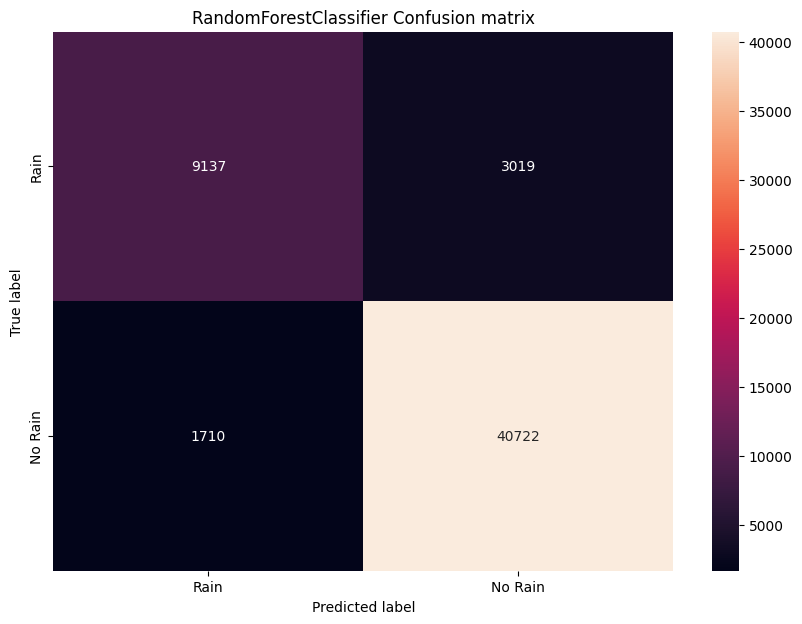

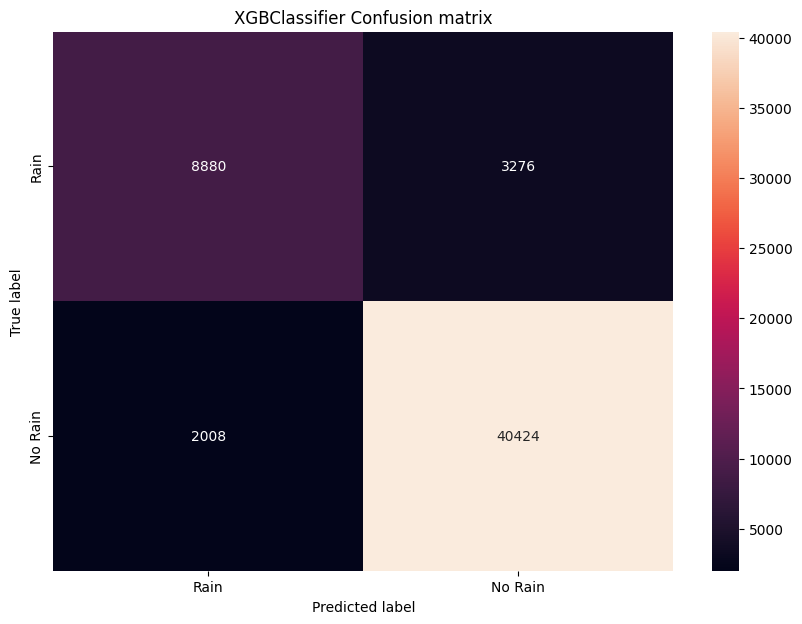

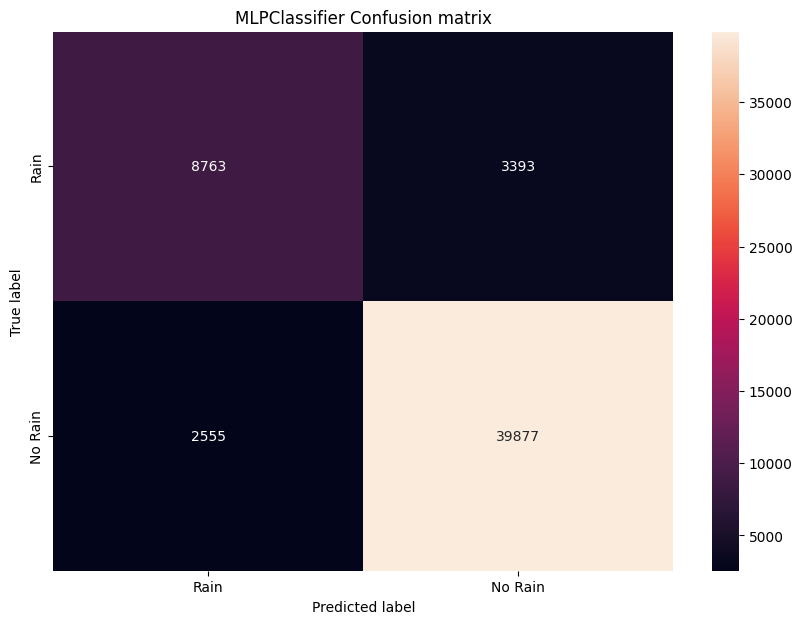

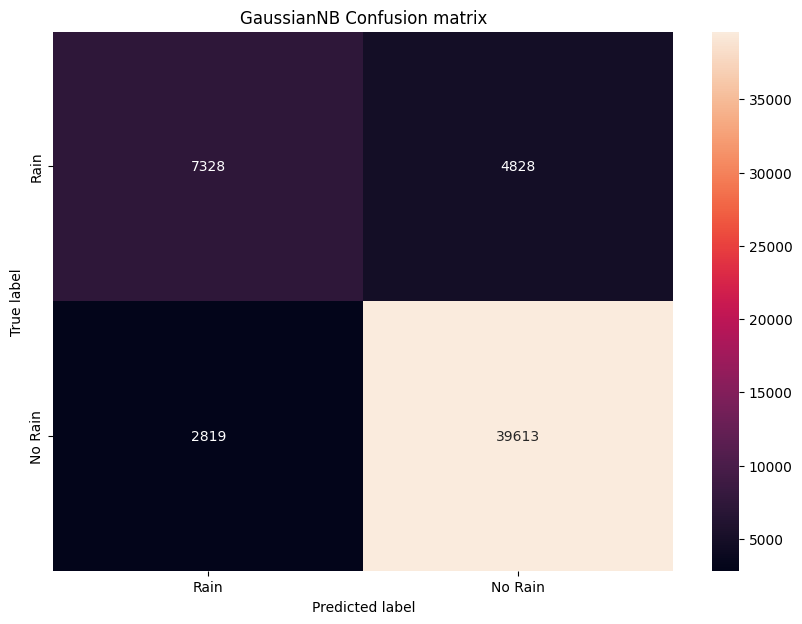

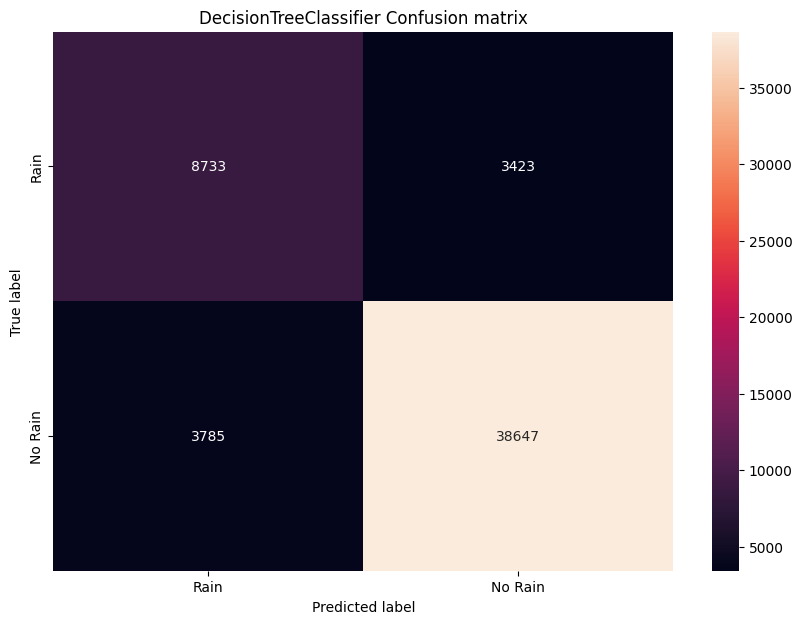

In [40]:
for index in range(len(Accuracy_set['Accuracy(Test)'])):
    plot_confusion_matrix(Accuracy_set['Confusion_Matrix(Test)'][index], "{} Confusion matrix".format(Accuracy_set['Model'][index]))

<a id="5"></a>
## <div style="text-align: left; background-color:#DEF5B9; font-family: Trebuchet MS; color:#1D3E06; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">5. Conclusion 🦆</div> 

<div style="border-radius:10px;
            border :#0A0104 solid;
            padding: 15px;
            background-color:#FFF0F5;
           font-size:110%;
            text-align: left">
   <span style="color:'black' ;"><center>🗺️ Some interesting things from the above analysis </mark>:</center></span>

- The province with the most observations is <mark>Bac Lieu</mark>.

- After Traning and Testing, we can see that the <mark>RandomForest</mark> model has the best accuracy score.

<div align="center"> <img src="https://media1.giphy.com/media/IRFQYGCokErS0/giphy.gif?cid=ecf05e47zliclumb4ro4ctbd9yf4n73pqaec15zggt0ch9ev&ep=v1_gifs_search&rid=giphy.gif&ct=g">< </div>